# Pipeline on the preprocessed generic model

In [1]:
import pandas as pd
import numpy as np
import maboss
import shutil
import os
import seaborn as sns
import matplotlib.pyplot as plt
from functions.generate_utils.create_generic_models.update_phenotypes_generic_models import generic_models_update_phenotypes
from functions.analysis_utils.MaBoSS_simulation.maboss_phenotype_patient import compute_phenotype_table_generic

In [2]:
# chose folder where we want all the personalized boolean models and associated results saved 
drug_interest = 'Refametinib' #Pictilisib, 'Avagacestat' AZD8931 
tissue_interest = 'Prostate'
tissue_remove = 'Haematopoietic and Lymphoid'

data_model_folder = 'data/montagud_models'
bnd_original_model = f'{data_model_folder}/Montagud2022_Prostate_Cancer.bnd'
cfg_original_model = f'{data_model_folder}/Montagud2022_Prostate_Cancer.cfg'



In [3]:
folder_model = 'analysis/generic_models'
folder_result = f'{folder_model}/results'

os.makedirs(folder_model, exist_ok=True)
os.makedirs(folder_result, exist_ok=True)


shutil.copy(bnd_original_model, f"{folder_model}/Montagud2022_{tissue_interest}_Cancer.bnd")
shutil.copy(cfg_original_model, f"{folder_model}/Montagud2022_{tissue_interest}_Cancer.cfg")


'analysis/generic_models/Montagud2022_Prostate_Cancer.cfg'

In [4]:
input_nodes = ['EGF', 'FGF', 'TGFB', 'Androgen', 'Hypoxia', 'Nutrients', 'Carcinogen', 'Acidosis', 'TNF', 'SPOP']
phenotypes_interest = [
        "Proliferation",
        "Invasion",
        "DNA_Repair",
        "Migration",
        "Apoptosis",
    ]

In [5]:
# update phenotypes 
generic_models_update_phenotypes(phenotypes_interest, folder_model)

Modified and saved: analysis/generic_models/Montagud2022_Prostate_Cancer.cfg


In [6]:
results_phenotypes = compute_phenotype_table_generic(folder_model,input_nodes,phenotypes_interest, folder_result)


Results:
- Generic models show overal less proliferation than the sensitive and resistant groups.
- no stats test possible as only one model

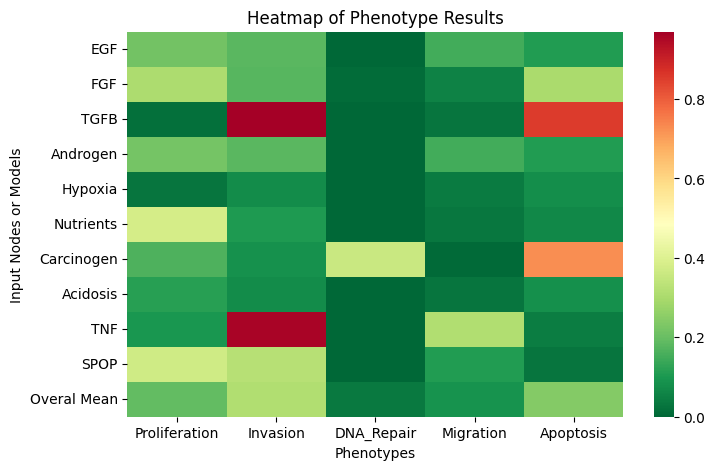

In [7]:
plt.figure(figsize=(8, 5))
results_phenotypes_numeric = results_phenotypes.apply(pd.to_numeric, errors='coerce')
sns.heatmap(results_phenotypes_numeric, annot=False, cmap="RdYlGn_r")
plt.title("Heatmap of Phenotype Results")
plt.xlabel("Phenotypes")
plt.ylabel("Input Nodes or Models")
plt.show()

Results
- TGFB can act as both an oncogene and tumor suppressor
- When Carcinogen is present this increase genome instability and DNA damage (DNA repair is a sensor of DNA damage)